<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

In [ ]:
#from darts.datasets import HeartRateDataset      -> is stationary
#data = HeartRateDataset().load()
from darts.datasets import AirPassengersDataset     # -> not stationary
data = AirPassengersDataset().load()
data.plot()

In [ ]:
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality,remove_seasonality, remove_trend, stationarity_test_adf, stationarity_test_kpss, stationarity_tests
from darts.utils.model_selection import train_test_split
from darts.utils.utils import ModelMode, SeasonalityMode
from darts.models import AutoARIMA, ARIMA, VARIMA

In [ ]:
check1 = stationarity_tests(data, 0.05, 0.05)
print(check1)
#stationary is based on data. Depending on the stationarity, forecasting models are used
#remove non-stationary attributes, apply ARIMA
#if seasonality exists, use SARIMA (seasonal ARIMA)
#VARIMA is used for multivariate data
#AutoARIMA is for optimal p,d,q values

In [ ]:
train, test = train_test_split(data, test_size=0.25, axis=0, input_size=0, horizon=0, vertical_split_type='simple', lazy=False)

In [ ]:
train.plot(label = 'train')
test.plot(label = 'test')

In [ ]:
model = ARIMA()
model.fit(train)
pred = model.predict(len(test))
train.plot(label = 'train')
test.plot(label = 'test')
pred.plot(label = 'pred')

In [ ]:
model2 = AutoARIMA()
model2.fit(train)
pred = model2.predict(len(test))
train.plot(label = 'train')
test.plot(label = 'test')
pred.plot(label = 'pred')

In [ ]:
data2, data3 = extract_trend_and_seasonality(data, freq=12, model=ModelMode.MULTIPLICATIVE, method='naive')
#data 2 is trend
#data 3 is seasonality

In [ ]:
check2 = stationarity_tests(data2, 0.05, 0.05)
print(check2)
#if data 2 is false, means trend exists

False


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
check3 = stationarity_tests(data3, 0.05, 0.05)
print(check3)
#if data 3 is true, means seasonality does not exist

True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


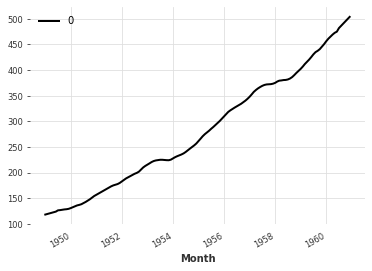

In [ ]:
#visualizations
data2.plot() #shows trend exists

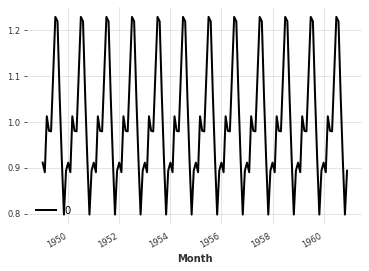

In [ ]:
data3.plot() #shows lack of seasonality

In [ ]:
#now that i know seasonality doesnt exist, i can simply remove trend only
data4 = remove_trend(data, model=ModelMode.MULTIPLICATIVE, method='naive')
#this trend is being removed from the original data

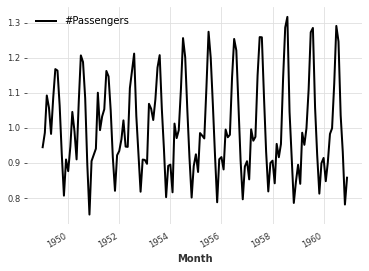

In [ ]:
data4.plot()

In [ ]:
#check for seasonality in data4
check3 = stationarity_tests(data4, 0.05, 0.05)
print(check3)

True


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


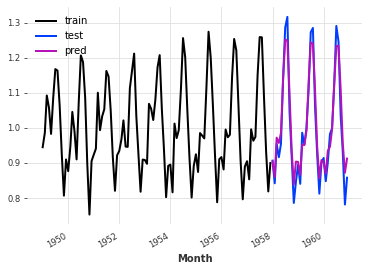

In [ ]:
#since, check3 is true. data is stationary now. use ARIMA()
train2, test2 = train_test_split(data4, test_size=0.25, axis=0, input_size=0, horizon=0, vertical_split_type='simple', lazy=False)
model3 = ARIMA()
model3.fit(train2)
pred2 = model3.predict(len(test2))
train2.plot(label = 'train')
test2.plot(label = 'test')
pred2.plot(label = 'pred')

In [ ]:
data.is_univariate    #if this is false, use VARIMA

True

In [ ]:
def vis(train3, test3, pred3):
  train3.plot(label = 'train')
  test3.plot(label = 'test')
  pred3.plot(label = 'pred')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-va

this runs 4
this runs 6
this runs 8
True
this runs 9
this runs 10
this runs 12


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


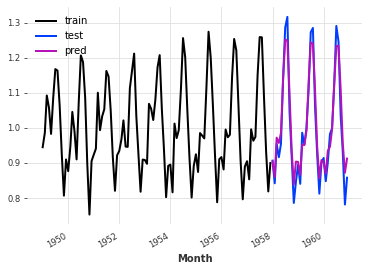

In [ ]:
if stationarity_tests(data, 0.05, 0.05):
  print('this runs 1')
  if data.is_univariate:
    print('this runs 2')
    train, test = train_test_split(data, test_size=0.25, axis=0, input_size=0, horizon=0, vertical_split_type='simple', lazy=False)
    model = ARIMA()
    model.fit(train)
    pred = model.predict(len(test))
    vis(train, test, pred)
  else:
    print('this runs 3')
    train, test = train_test_split(data, test_size=0.25, axis=0, input_size=0, horizon=0, vertical_split_type='simple', lazy=False)
    model = VARIMA()
    model.fit(train)
    pred = model.predict(len(test))
    vis(train, test, pred)
else:
  print('this runs 4')
  data2, data3 = extract_trend_and_seasonality(data, freq=12, model=ModelMode.MULTIPLICATIVE, method='naive')
  #either data has trend, seasonality or both
  if (not stationarity_tests(data2, 0.05, 0.05)) and (not stationarity_tests(data3, 0.05, 0.05)) :
    print('this runs 5')
    #means trend and stationary both exists, remove both
    #data4 = remove_trend(data, model=ModelMode.MULTIPLICATIVE, method='naive').remove_seasonality(data, freq=None, model=SeasonalityMode.MULTIPLICATIVE, method='naive')
    data4 = remove_seasonality(data, freq=None, model=SeasonalityMode.ADDITIVE, method='STL')
    # method = 'naive' with model = 'multiplicative' if only seasonal
    # method = 'STL' with model = 'additive' if both seasonal and trend
  elif not stationarity_tests(data2, 0.05, 0.05):
    print('this runs 6')
    #means only trend exists, remove it
    data4 = remove_trend(data, model=ModelMode.MULTIPLICATIVE, method='naive')
  else:
    print('this runs 7')
    #means only seasonality exists, remove it
    data4 = remove_seasonality(data, freq=None, model=SeasonalityMode.MULTIPLICATIVE, method='naive')

#check stationarity again
print('this runs 8')
check = stationarity_tests(data4, 0.05, 0.05)
print(check)

 #if true use ARIMA, if false (check if seasonality still exists, if true use SARIMA)

if not stationarity_tests(data4, 0.05, 0.05):
  if check_seasonality(data4, m=None, max_lag=24, alpha=0.05):
      print('use SARIMA')

print('this runs 9')
train2, test2 = train_test_split(data4, test_size=0.25, axis=0, input_size=0, horizon=0, vertical_split_type='simple', lazy=False)

if data.is_univariate:
  print('this runs 10')
  model2 = ARIMA()
else:
  print('this runs 11')
  model2 = VARIMA()

print('this runs 12')
model2.fit(train2)
pred2 = model2.predict(len(test2))
vis(train2, test2, pred2)
